[View in Colaboratory](https://colab.research.google.com/github/pilipolio/python-ml-notebooks/blob/master/201804_FashionFeaturesExtraction.ipynb)

In [4]:
! wget http://hi.cs.waseda.ac.jp/~esimo//data/FashionStyle14_v1.tar.gz -O FashionStyle14_v1.tar.gz

--2018-04-06 07:20:24--  http://hi.cs.waseda.ac.jp/~esimo//data/FashionStyle14_v1.tar.gz
Resolving hi.cs.waseda.ac.jp (hi.cs.waseda.ac.jp)... 133.9.187.220
Connecting to hi.cs.waseda.ac.jp (hi.cs.waseda.ac.jp)|133.9.187.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1495698011 (1.4G) [application/x-gzip]
Saving to: ‘FashionStyle14_v1.tar.gz’

FashionStyle14_v1.t  58%[==========>         ] 835.33M  30.0MB/s    eta 33s    

FashionStyle14_v1.t 100%[===================>]   1.39G  27.2MB/s    in 69s     

2018-04-06 07:21:33 (20.6 MB/s) - ‘FashionStyle14_v1.tar.gz’ saved [1495698011/1495698011]



In [0]:
! tar xzf FashionStyle14_v1.tar.gz

In [6]:
! find FashionStyle14_v1/ -type f -name '*.*' | head

FashionStyle14_v1/train.csv
FashionStyle14_v1/dataset/kireime-casual/7dc1766dad000c674ba7e0c5dc7c04ff.jpg
FashionStyle14_v1/dataset/kireime-casual/a10df40ff826faf6efaddb4b90ad6461.jpg
FashionStyle14_v1/dataset/kireime-casual/._mig (1).jpg
FashionStyle14_v1/dataset/kireime-casual/large_772402_1.jpg
FashionStyle14_v1/dataset/kireime-casual/4a53aa0b8c9cce7a38cbbd1365805bb6.jpg
FashionStyle14_v1/dataset/kireime-casual/7d68da2d06cf09b01cf9ea234557bc11-225x300.jpg
FashionStyle14_v1/dataset/kireime-casual/wear030318.jpg
FashionStyle14_v1/dataset/kireime-casual/3b95f753-3686-46f4-ab7c-d619a8abfe3b.jpg
FashionStyle14_v1/dataset/kireime-casual/0m0e1af1f0e84d280e363e604635746b752c33273163026b16402e206071794459223346687e33714d78685d344657351935672367226f3c7b5454407b6c737315246161707c157e01626a6a711d613a6b246b27637c492a097a112d.jpg
find: ‘standard output’: Broken pipe
find: write error


In [0]:
# Renaming image names with exotic character
! find FashionStyle14_v1/ -type f -name '*.*'  | cat -n | while read n f; do mv "$f" "${f%/*}/${n}.${f##*.}"; done 

In [8]:
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl torchvision tqdm

    41% |█████████████▏                  | 243.5MB 430kB/s eta 0:13:31

    100% |████████████████████████████████| 592.3MB 2.2MB/s 


    100% |████████████████████████████████| 51kB 2.9MB/s 
    100% |████████████████████████████████| 2.0MB 640kB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch
from torchvision import datasets
from torchvision import transforms


scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

image_dataset = datasets.folder.ImageFolder(
    'FashionStyle14_v1/dataset',
    transforms.Compose([
        scaler,
        transforms.ToTensor(),
        normalize,
    ])
)


In [2]:
len(image_dataset.imgs)

13660

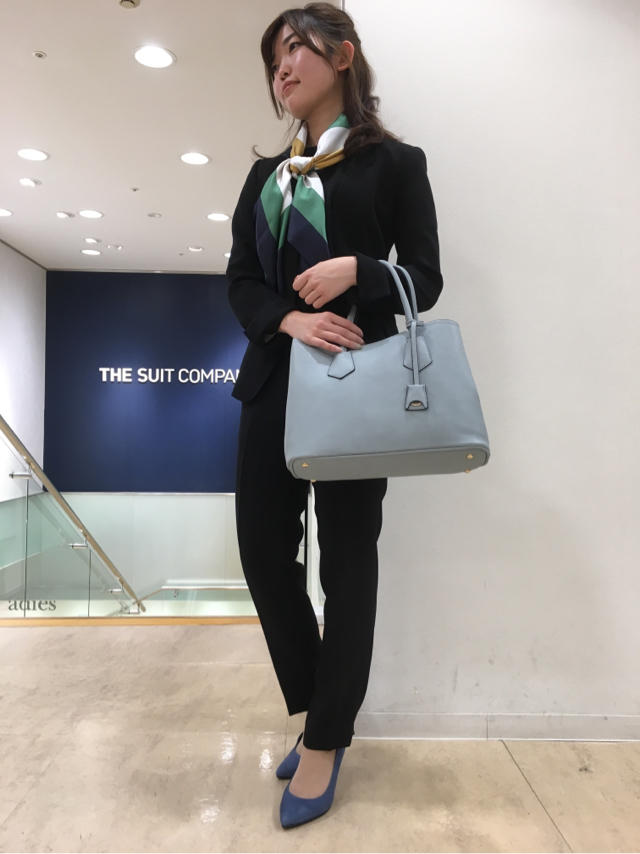

In [3]:
from PIL import Image
Image.open(image_dataset.imgs[0][0]).convert('RGB')

In [4]:
import os

from PIL import Image

image_paths, labels = zip(*image_dataset.imgs)

def is_not_valid_image(path):
  try:
    Image.open(path)
    return False
  except:
    return True

not_valid_paths = list(filter(is_not_valid_image, image_paths))
len(not_valid_paths)

for f in not_valid_paths:
  os.remove(f)

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


579

In [5]:
import torch
from torchvision import datasets
from torchvision import transforms

scaler = transforms.Resize((224, 224))
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

image_dataset = datasets.folder.ImageFolder(
    'FashionStyle14_v1/dataset',
    transforms.Compose([
        scaler,
        transforms.ToTensor(),
        normalize,
    ])
)

train_loader = torch.utils.data.DataLoader(
    image_dataset,
    batch_size=1, shuffle=True)

train_loader

image_tensor, label  = next(iter(train_loader))
print(image_tensor.shape)
image_tensor, label

torch.Size([1, 3, 224, 224])


(
 ( 0 , 0 ,.,.) = 
  -0.5596 -0.4911 -0.6794  ...  -0.4226 -0.4226 -0.4397
  -0.5253 -0.5596 -0.8164  ...  -0.4226 -0.4226 -0.4397
  -0.5596 -0.6109 -0.8678  ...  -0.4739 -0.4739 -0.4739
            ...             ⋱             ...          
  -0.8849 -0.9363 -0.9363  ...  -0.8507 -0.8678 -0.8507
  -0.7137 -0.7137 -0.6965  ...  -0.7479 -0.8678 -0.9534
  -0.7650 -0.7137 -0.6281  ...  -0.5596 -0.6794 -0.7822
 
 ( 0 , 1 ,.,.) = 
  -0.0924 -0.0224 -0.2675  ...  -0.0224 -0.0224 -0.0399
  -0.0574 -0.0924 -0.4076  ...  -0.0224 -0.0224 -0.0399
  -0.0924 -0.1450 -0.4601  ...  -0.0749 -0.0749 -0.0749
            ...             ⋱             ...          
  -0.4426 -0.4951 -0.4951  ...  -0.5476 -0.5651 -0.5476
  -0.4951 -0.4951 -0.4251  ...  -0.5651 -0.6877 -0.7752
  -0.5651 -0.5126 -0.3725  ...  -0.3725 -0.4951 -0.6001
 
 ( 0 , 2 ,.,.) = 
  -0.0267  0.0431 -0.1835  ...   0.1476  0.1476  0.1302
   0.0082 -0.0267 -0.3230  ...   0.1476  0.1476  0.1302
  -0.0267 -0.0790 -0.3753  ...   0.0953  0.0

In [1]:
from torchvision import models
from torch import nn

model = models.alexnet(pretrained=True)

model.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d (64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d (192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d (384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_features=4096)
    (5): ReLU(inplace)
    (6): Linea

In [14]:
torch.cuda.is_available()

False

In [6]:
import torch
from torch.autograd import Variable

from tqdm import tqdm
from itertools import islice

BATCH_SIZE = 64
batch_images_loader = torch.utils.data.DataLoader(
    image_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False)


non_cuda_model = models.alexnet(pretrained=True)

for batch_images_tensor, labels in tqdm(islice(batch_images_loader, 10)):
  batch_features = non_cuda_model.features(Variable(batch_images_tensor))

10it [00:32,  3.25s/it]


In [9]:
torch.cuda.is_available()

True

In [8]:
from torch.autograd import Variable
from tqdm import tqdm

cuda_model = models.alexnet(pretrained=True)
cuda_model.cuda()

for batch_images_tensor, labels in tqdm(islice(batch_images_loader, 10)):
  batch_features = cuda_model.features(Variable(batch_images_tensor).cuda())
  


10it [00:13,  1.31s/it]


In [0]:
batch_images_features = [model.features(Variable(batch_images_tensor).cuda()).data.cpu().numpy() 
                         for batch_images_tensor, labels in tqdm(batch_images_loader)]

print(len(batch_images_features))

# Back-propagation

In [0]:
class ImageClassifier(nn.Module):
    LAST_LAYER_SIZE = 9216
    
    def __init__(self, num_classes, alexnet_model, freeze_features=True):
        super(ImageClassifier, self).__init__()
        self.feature_model = alexnet_model.features
        
        if freeze_features:
            for p in self.feature_model.parameters():
                p.requires_grad = False

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(self.LAST_LAYER_SIZE, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, num_classes),
        )
        
    def forward(self, x):
        features = self.feature_model(x)
        flattened_features = features.view(features.size(0), -1)
        return self.classifier(flattened_features)
      
classifier = ImageClassifier(
    num_classes=len(image_dataset.class_to_idx),
    alexnet_model=model,
    freeze_features=False)

In [26]:
predictions = classifier(Variable(image_tensor))

predictions

Variable containing:

Columns 0 to 9 
 0.5252  0.5618  0.0816 -0.1265 -0.1889  0.1362  0.2988 -0.5969  1.4379 -0.7633

Columns 10 to 13 
-0.1585  0.9890 -1.7299  0.0692
[torch.FloatTensor of size 1x14]

In [32]:
num_epochs = 1
batch_size = 64
n_batches = 10

use_cuda = False

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.01)


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(tqdm(islice(batch_images_loader, 10))):
        images = Variable(images)
        labels = Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = classifier(images)                      # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 5 == 0:                              # Logging
            tqdm.write('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(image_dataset)//batch_size, loss.data[0]))



0it [00:00, ?it/s]
1it [00:06,  6.15s/it]
2it [00:12,  6.01s/it]
3it [00:18,  6.22s/it]
4it [00:24,  6.24s/it]
5it [00:30,  6.18s/it]

Epoch [1/1], Step [5/204], Loss: 0.0000



6it [00:36,  6.14s/it]
7it [00:43,  6.21s/it]
8it [00:49,  6.22s/it]
9it [00:55,  6.22s/it]
10it [01:02,  6.21s/it]


Epoch [1/1], Step [10/204], Loss: 0.0000


In [35]:
num_epochs = 1
batch_size = 64
n_batches = 10

use_cuda = True
classifier = ImageClassifier(
    num_classes=len(image_dataset.class_to_idx),
    alexnet_model=cuda_model,
    freeze_features=False)
classifier.cuda()


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.01)


for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(tqdm(islice(batch_images_loader, 10))):
        images = Variable(images)
        labels = Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = classifier(images)                      # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
        if (i+1) % 5 == 0:                              # Logging
            tqdm.write('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(image_dataset)//batch_size, loss.data[0]))



0it [00:00, ?it/s]
1it [00:01,  1.17s/it]
2it [00:02,  1.04s/it]
3it [00:03,  1.27s/it]

  4%|▍         | 8/205 [03:57<1:37:36, 29.73s/it]
4it [00:06,  1.59s/it]
5it [00:06,  1.27s/it]

Epoch [1/1], Step [5/204], Loss: 0.0000



6it [00:07,  1.23s/it]
7it [00:09,  1.30s/it]
8it [00:10,  1.31s/it]

  4%|▍         | 8/205 [04:04<1:40:21, 30.57s/it]
9it [00:13,  1.45s/it]
10it [00:13,  1.31s/it]


Epoch [1/1], Step [10/204], Loss: 0.0000
